  # PD Model Preprocessing

## Pre-processing the data

In [2]:
import numpy as np
import pandas as pd

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [4]:
# Import the pre-processed data
loan_data = pd.read_csv('C:/Users/ahmed/Desktop/DS PROJECTS/Credit-Risk-Model/Credit-Risk-Model/Data/preprocessed_loan_data1.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [8]:
loan_data["good_bad"] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [9]:
loan_data[["good_bad"]]

,good_bad
0,1
1,0
2,1
3,1
4,1
...,...
466280,1
466281,0
466282,1
466283,1


## Splitting the Data

In [10]:
# import train_test_split from sklearn 
from sklearn.model_selection import train_test_split

In [11]:
# drop the column for the dependent variable good_bad
loan_data_features = loan_data.drop('good_bad', axis = 1)

In [12]:
# split the data to 0.8 train and 0.2 test 
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_features, loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [13]:
# loan_data_inputs_test.shape
# loan_data_inputs_train.shape
# loan_data_targets_test.shape
loan_data_targets_train.shape

(373028,)

## Data Preparation

In [14]:
#####
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#####
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [15]:
# working on the credit grade column to determine WoE and Information value.
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [16]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)

In [17]:
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [18]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# pd.options.display.max_rows = None

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [19]:
#since the "good_bad" column consists of 1 for good, and 0 for bad, we take the mean to know the proportion of the each category which is good.
# for proportion bad, it can be taken as 1- (aggregate value of good in the respective category.)
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [20]:
# join the to dataframes together to get a  better structure.
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(), df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [21]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [22]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [23]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [24]:
#  the proportion of the total observation that each category has, is calculated and stored in 'prop_n_obs'
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [25]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [26]:
# calculate the number of good borrowers that fall in each category
df1['n_good'] = df1['n_obs'] * df1['prop_good']
df1['n_bad'] = df1['n_obs'] * (1 - df1['prop_good'])
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [27]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


## Calculate the WoE ( Weight of Evidence) and the Information value for the Credit grade variable. 

In [28]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [29]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [30]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


### INFORMATION VALUE

In [31]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### We observe that I.V is the same across all rows , this is because we are dealing with a single variable

## Preprocessing Discrete Variables: Automating Calculations.We write a function to calculate the weight of evidence for the Discrete variables.

In [32]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(), 
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop= True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [33]:
df_temp = woe_discrete (df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Visualising Results The WOE determines the categories selected in the model. i.e The farther away from 0, the WOE, the better the category in differentiatinfg between the 2 outcomes of the dependent variable.

In [34]:
#  we plot the WoE againist its respective cateorical variables using matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [35]:
def plot_by_woe (df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array (df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 7))
    plt.plot(x, y, marker = 'o', linestyle = "--", color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

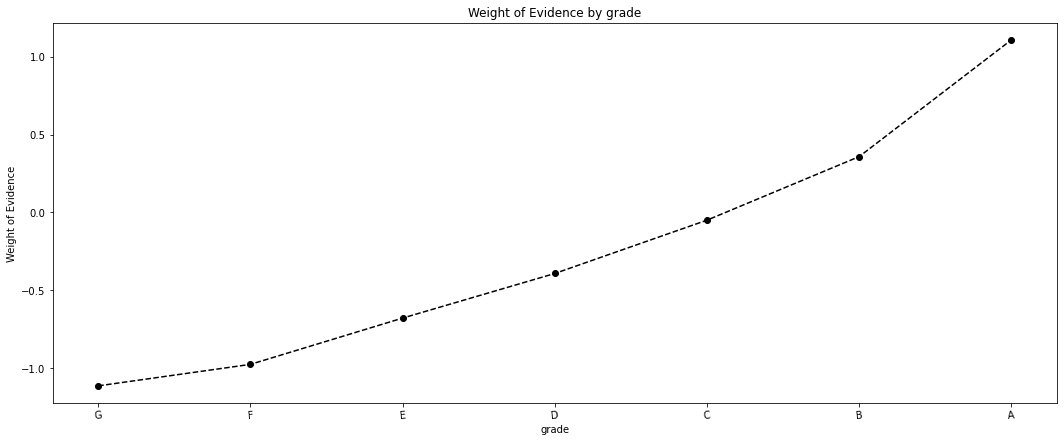

In [36]:
plot_by_woe (df_temp, 5)

We use the categories directoly because the credit grade has an immense impact on the loan_status, but, we take grade:G as the refrence
because it has the lowest WoE. In some independent variables coarse classing is done based on WOE and no of observations of categories of an independent variable i.e when treating them as dummies. Class categories with similar WOE together 

### Dealing with the "home_ownership" variable

In [37]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp
# pd.options.display.max_rows = 10

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


### The IV is not calculated in this variable, this is due to the division by 0, in the 'ANY' category.

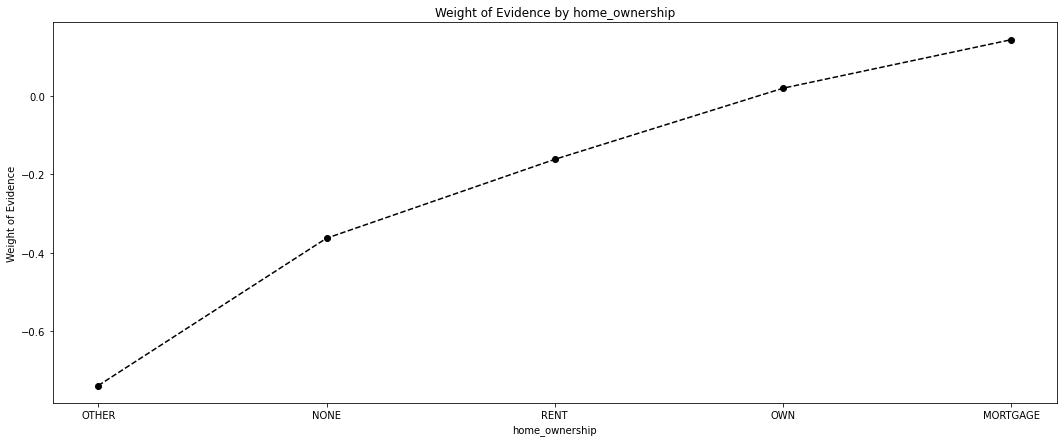

In [38]:
plot_by_woe(df_temp)

#### We combine the categories "Rent, Other, None, Any" , because Other,None,Any are underrepresented and because we are uncertain of its effects.

In [39]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

<ipython-input-39-2d91c7b9543c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],


### Preprocessing Discrete Variables: Address State

In [40]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [41]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


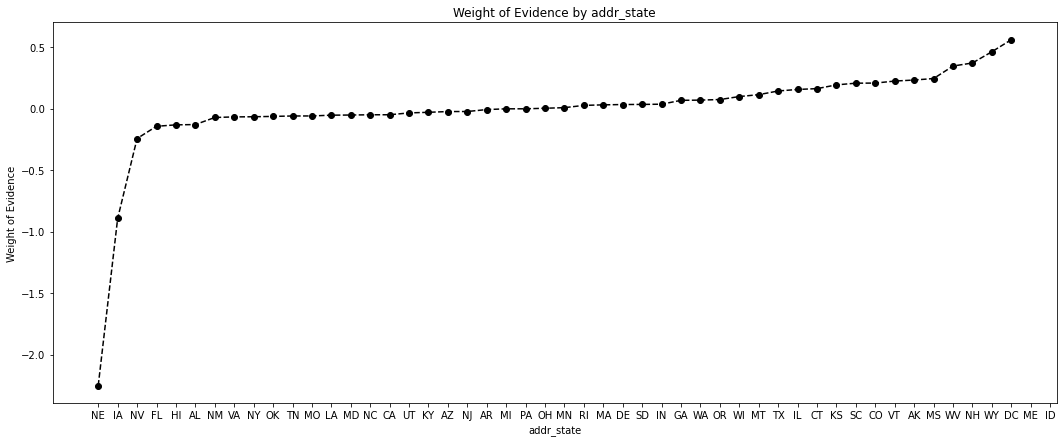

In [42]:
plot_by_woe(df_temp)

## We can see that there is significant difference between the number of observations in 'NE, IA, ME, ID' compared to the other states. 

In [43]:
# The state ND is missing in this case, but if it exists we want to set it to 0.
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

<ipython-input-43-cb1631c7d016>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['addr_state:ND'] = 0


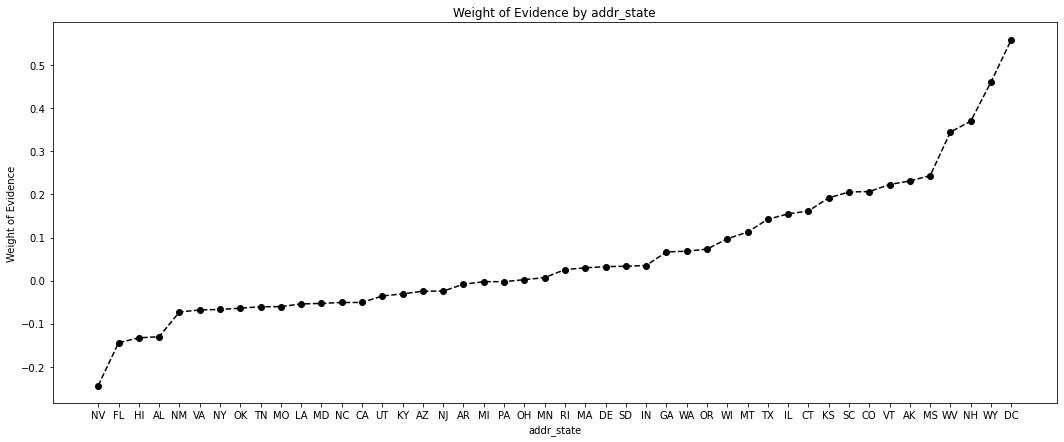

In [44]:
# We will explore further, by visualising without the 4 states listed above
plot_by_woe(df_temp.iloc[2: -2, :])

#### This new graph gives us a clearer insights on what the weight of the evidence looks like for each state. Some states have similar WOE an hence we can classify or combine these categories together , provided the number of observations is not outrageous.


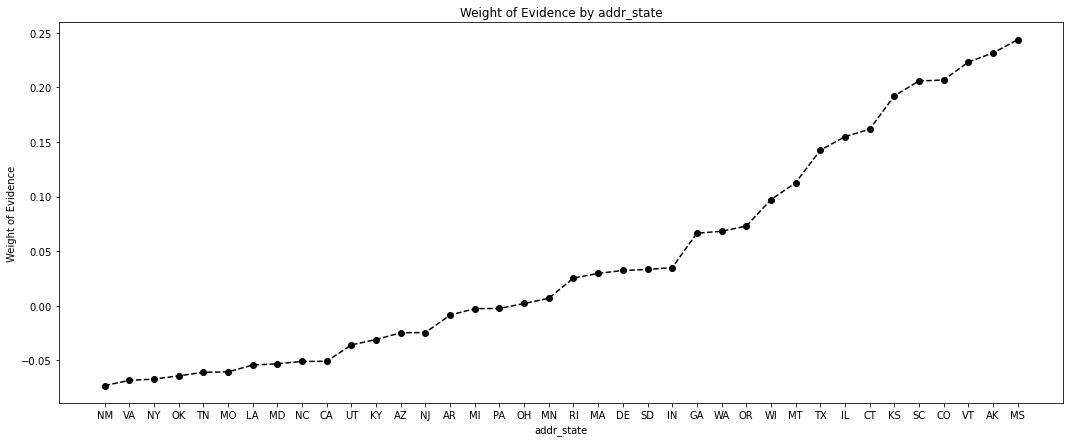

In [45]:
plot_by_woe(df_temp.iloc[6: -6, :])
# Some states have siilar WoE or we say they close to each other in WoE, we can classify or combine these categories.

While combining these categories , it is important to look at tthe number of observations, if the observations are substantial, we seperate them

In [46]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

<ipython-input-46-d9b9fb98a3e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
<ipython-input-46-d9b9fb98a3e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])
<ipython-input-46-d9b9fb98a3e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [47]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.

pd.options.display.max_rows = 5
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


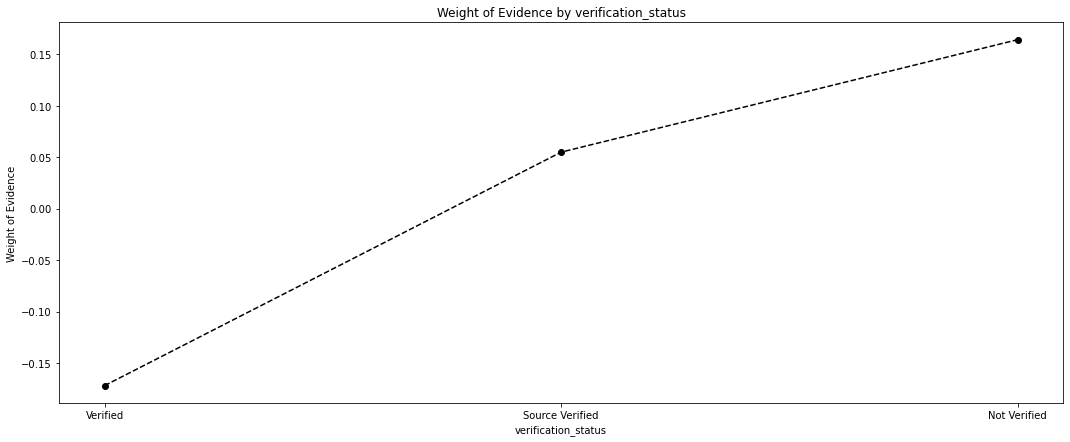

In [48]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [49]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
pd.options.display.max_rows = None
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


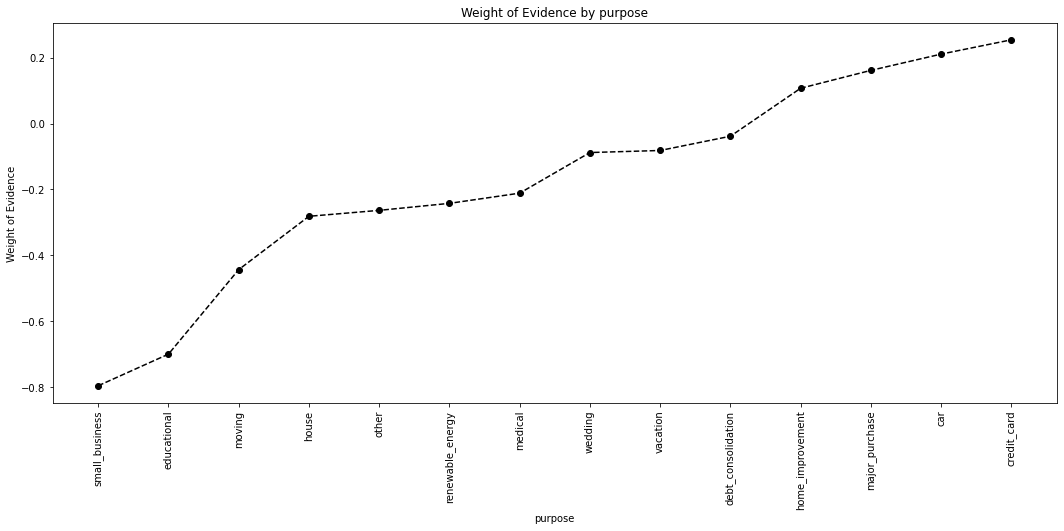

In [50]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [51]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house' due to the low 
# number of obsservations
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.

df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])


df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])


df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.

<ipython-input-51-2c8c0791f5cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
<ipython-input-51-2c8c0791f5cf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
<ipython-input-51-2c8c0791f5cf>:17: SettingWithCopyWarning: 
A value is 

In [52]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


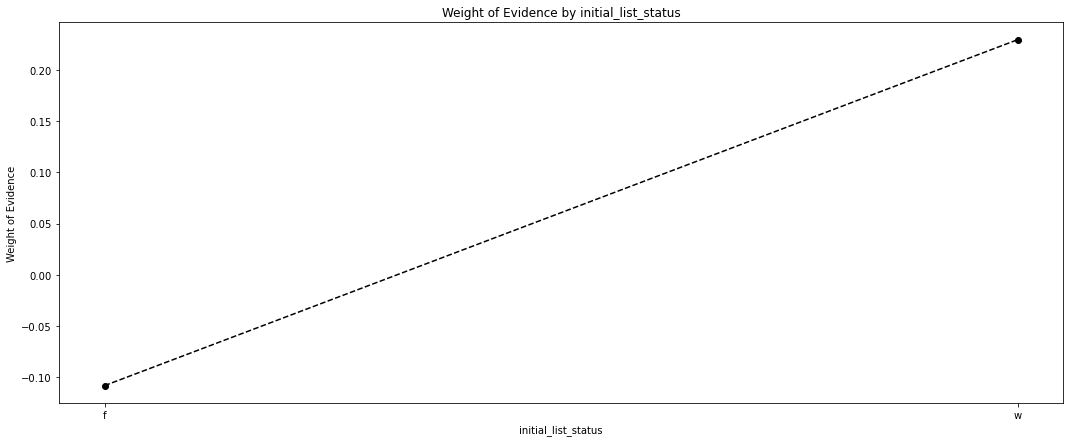

In [53]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [54]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df1 = df
    df = df.iloc[:, [0, 1, 3]]

    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']

    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [55]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [56]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp
# df

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


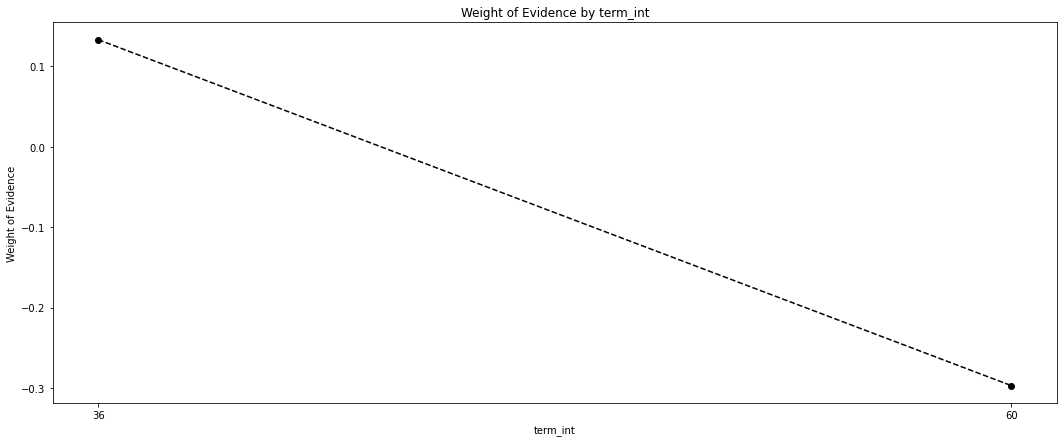

In [57]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [58]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

<ipython-input-58-98f1839cc0fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
<ipython-input-58-98f1839cc0fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)


In [59]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [60]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


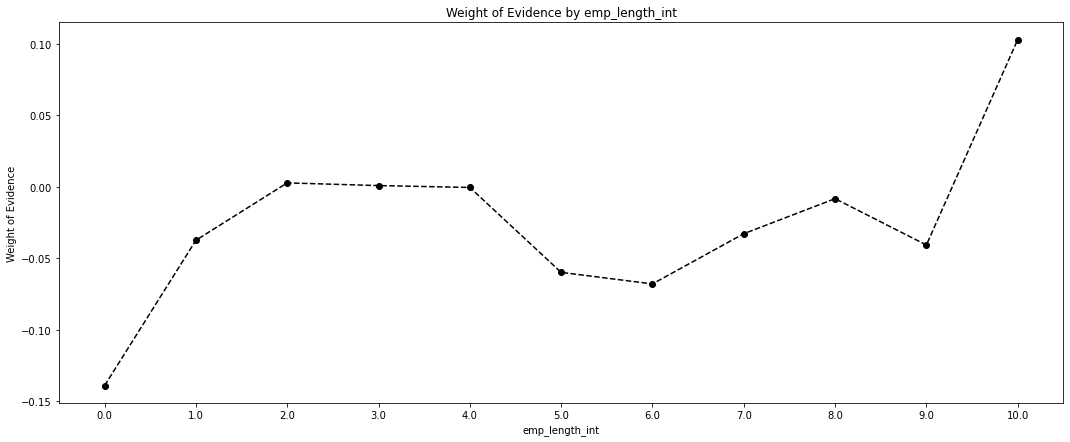

In [61]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [62]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

<ipython-input-62-3a1f177c21d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
<ipython-input-62-3a1f177c21d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
<ipython-input-62-3a1f177c21d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [63]:
df_inputs_prepr['mths_since_issue_d'].unique()

pd.options.display.max_rows = 10
df_inputs_prepr

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10
427211,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,0,0,1,0,0,0,1,0,0,0
206088,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,1,0,0,0,0,1,0,0
136020,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,1,0,0,0,0,0,0,1
412305,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,1,0,0,0,0,0,1,0
36159,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,259178,34392215,37055507,5000,5000,5000.0,36 months,8.67,158.24,...,0,0,1,0,0,0,1,0,0,0
365838,365838,365838,19345890,21548652,20000,20000,20000.0,36 months,12.49,668.98,...,0,0,1,0,0,0,0,0,0,1
131932,131932,131932,5145550,6467765,19200,19200,19175.0,36 months,14.09,657.06,...,0,0,1,0,0,0,0,0,0,1
146867,146867,146867,4374922,5607101,15500,15500,15500.0,36 months,11.14,508.48,...,0,0,1,0,0,0,0,0,0,1


In [64]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

<ipython-input-64-9d1723122125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)


In [65]:
df_inputs_prepr['mths_since_issue_d_factor']

427211     (32.2, 34.0]
206088     (52.0, 53.8]
136020     (41.2, 43.0]
412305     (32.2, 34.0]
36159      (89.8, 91.6]
              ...      
259178    (24.91, 26.8]
365838     (30.4, 32.2]
131932     (41.2, 43.0]
146867     (44.8, 46.6]
121958     (41.2, 43.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(24.91, 26.8] < (26.8, 28.6] < (28.6, 30.4] < (30.4, 32.2] ... (107.8, 109.6] < (109.6, 111.4] < (111.4, 113.2] < (113.2, 115.0]]

In [66]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(24.91, 26.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(26.8, 28.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(28.6, 30.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(30.4, 32.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(32.2, 34.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(106.0, 107.8]",247,0.797571,0.000662,197.0,50.0,0.000593,0.001226,-0.726564,0.035307,0.206048,0.113186
46,"(107.8, 109.6]",394,0.723350,0.001056,285.0,109.0,0.000858,0.002673,-1.136604,0.074221,0.410039,0.113186
47,"(109.6, 111.4]",176,0.704545,0.000472,124.0,52.0,0.000373,0.001275,-1.228707,0.018805,0.092103,0.113186
48,"(111.4, 113.2]",104,0.750000,0.000279,78.0,26.0,0.000235,0.000638,-0.999133,0.045455,0.229574,0.113186


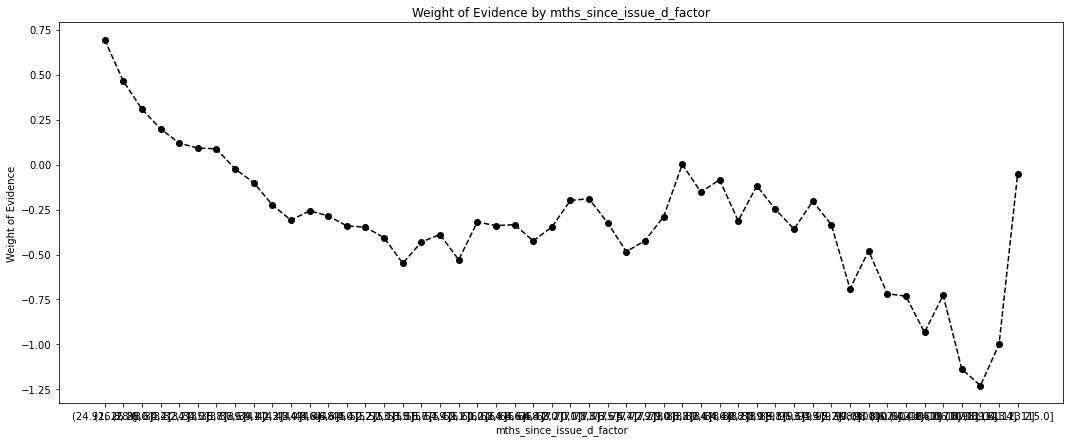

In [67]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

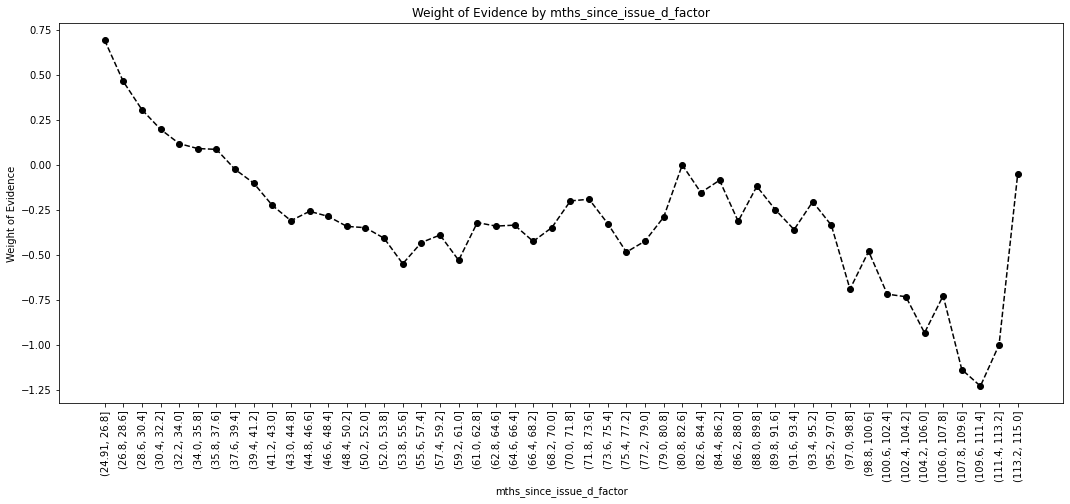

In [68]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

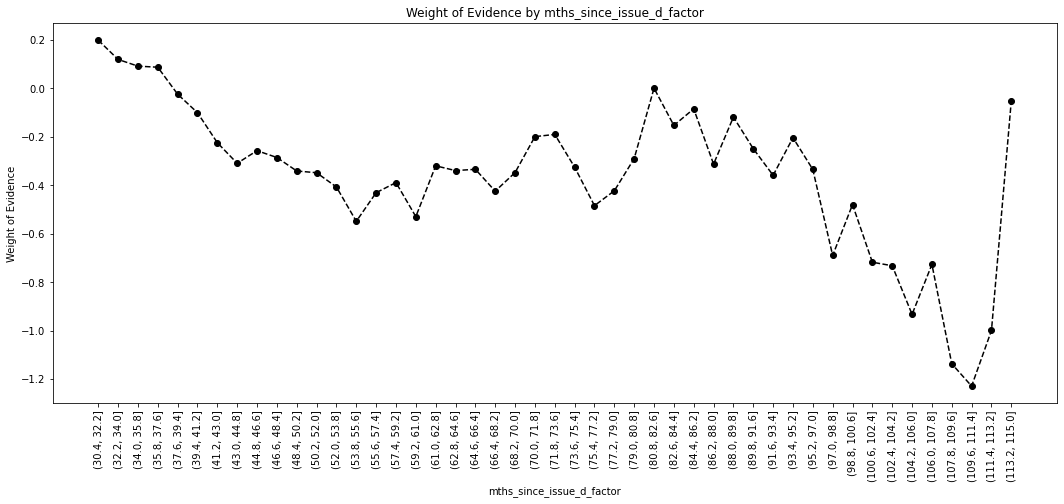

In [69]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [70]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

<ipython-input-70-15bd7cb3bc5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
<ipython-input-70-15bd7cb3bc5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
<ipython-input-70-15bd7cb3bc5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [71]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

<ipython-input-71-7f447203d647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)


In [72]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(23.996, 24.409]",1455,0.767698,0.003901,1117.0,338.0,0.003362,0.008289,-0.902389,0.043604,0.230494,0.343349
46,"(24.409, 24.822]",1664,0.762620,0.004461,1269.0,395.0,0.003819,0.009687,-0.930646,0.005077,0.028257,0.343349
47,"(24.822, 25.234]",1315,0.771103,0.003525,1014.0,301.0,0.003052,0.007381,-0.883197,0.008482,0.047449,0.343349
48,"(25.234, 25.647]",778,0.736504,0.002086,573.0,205.0,0.001725,0.005027,-1.069869,0.034599,0.186672,0.343349


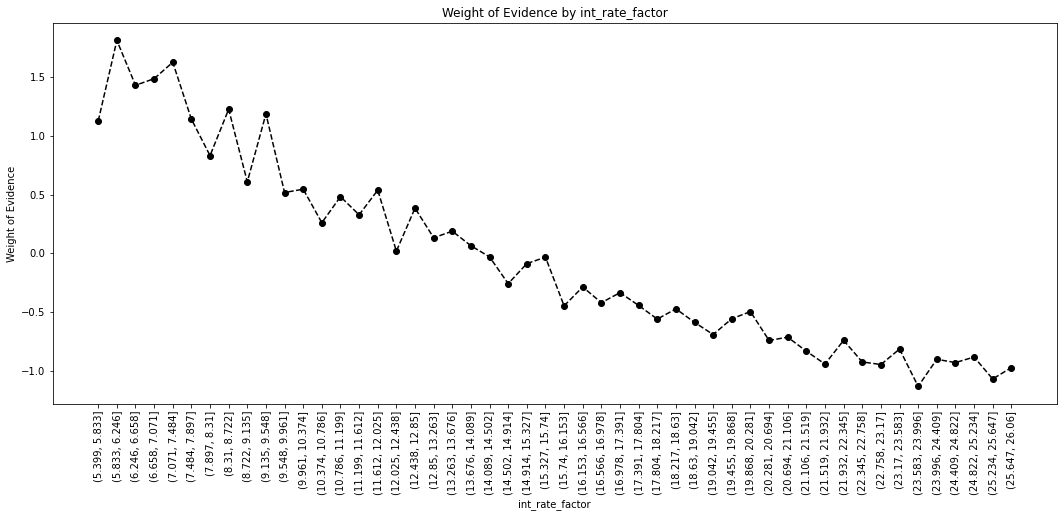

In [73]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [74]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [75]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

<ipython-input-75-2ec85aee664e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
<ipython-input-75-2ec85aee664e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
<ipython-input-75-2ec85aee664e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [76]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

<ipython-input-76-1c93c3ae8cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(31550.0, 32240.0]",1326,0.872549,0.003555,1157.0,169.0,0.003482,0.004144,-0.174058,0.010935,0.102159,0.014139
46,"(32240.0, 32930.0]",631,0.874802,0.001692,552.0,79.0,0.001661,0.001937,-0.153645,0.002253,0.020413,0.014139
47,"(32930.0, 33620.0]",1090,0.895413,0.002922,976.0,114.0,0.002938,0.002796,0.049519,0.020611,0.203164,0.014139
48,"(33620.0, 34310.0]",492,0.890244,0.001319,438.0,54.0,0.001318,0.001324,-0.004510,0.005169,0.054029,0.014139


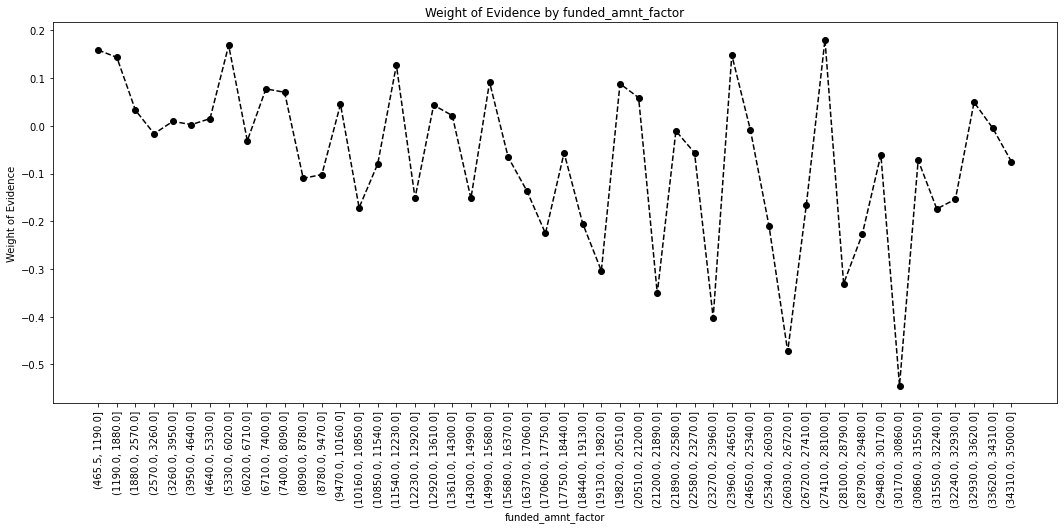

In [77]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [78]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

<ipython-input-78-19fbe0948e55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,0.016273
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016273
...,...,...,...,...,...,...,...,...,...,...,...,...
45,"(528.3, 540.04]",580,0.913793,0.001555,530.0,50.0,0.001595,0.001226,0.263109,0.011924,0.142686,0.016273
46,"(540.04, 551.78]",471,0.915074,0.001263,431.0,40.0,0.001297,0.000981,0.279484,0.001281,0.016375,0.016273
47,"(551.78, 563.52]",339,0.899705,0.000909,305.0,34.0,0.000918,0.000834,0.096206,0.015369,0.183277,0.016273
48,"(563.52, 575.26]",347,0.893372,0.000930,310.0,37.0,0.000933,0.000907,0.027909,0.006333,0.068297,0.016273


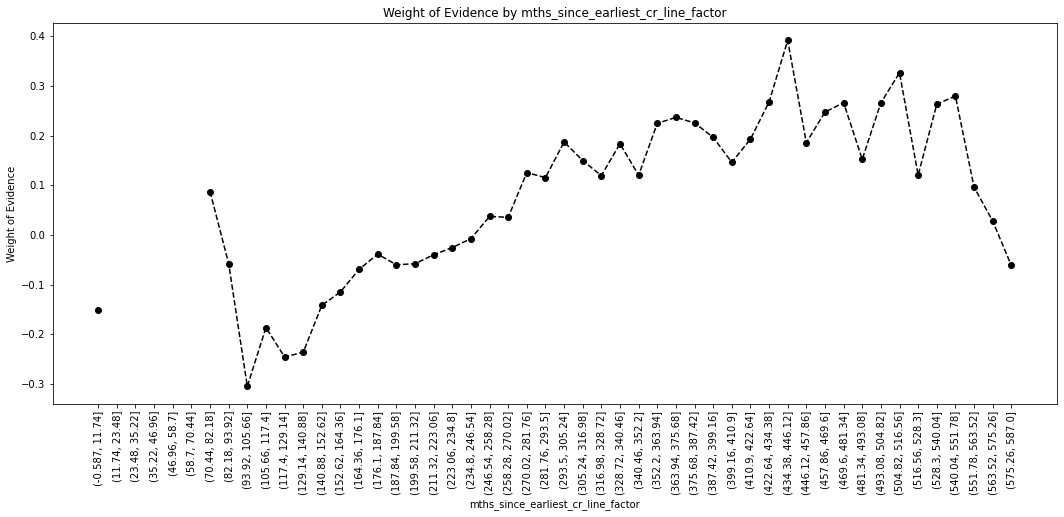

In [79]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

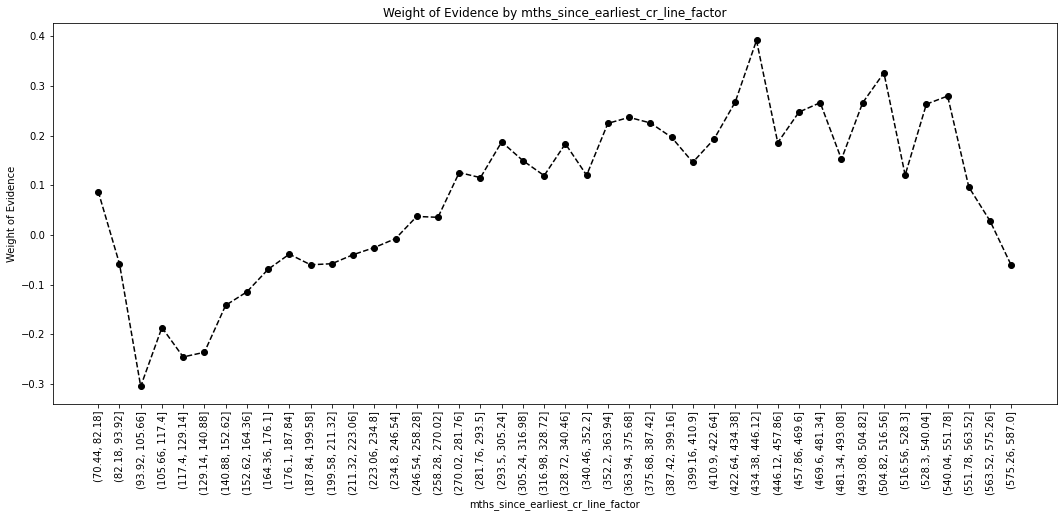

In [80]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

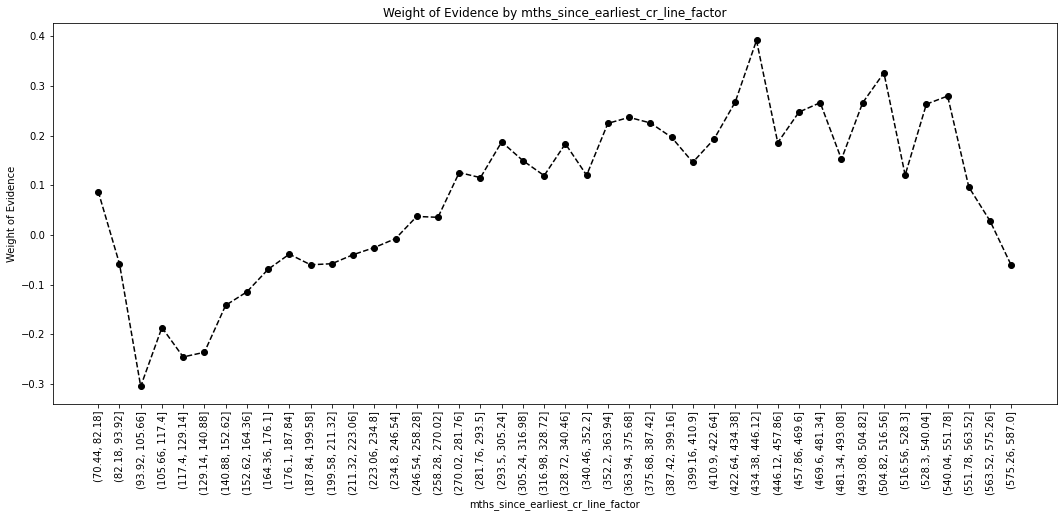

In [81]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [82]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

<ipython-input-82-7f3549630d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
<ipython-input-82-7f3549630d39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
<ipython-input-82-7f3549630d39>:5: SettingWithCopyWarning: 
A value is try

In [83]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
19,19.0,2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,0.333333,inf,inf
20,21.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf
21,22.0,2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,0.500000,inf,inf
22,24.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


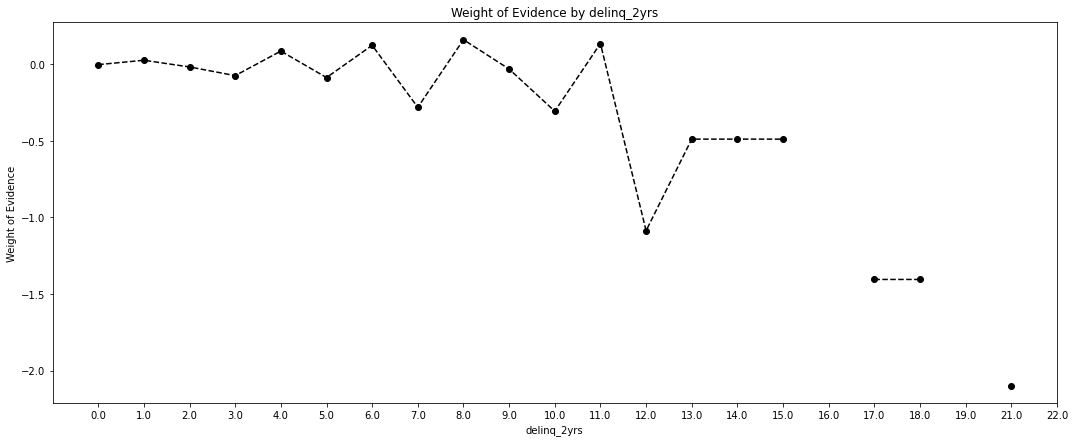

In [84]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.